In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn import metrics

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


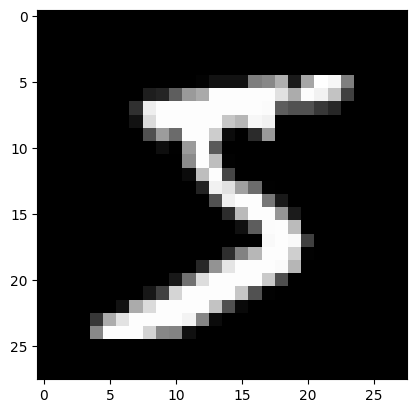

In [ ]:
plt.imshow(x_train[0], cmap='gray')
plt.show()

In [ ]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [ ]:
print("x_train shape: ",x_train.shape)
print("y_train shape: ",y_train.shape)
print("x_test shape: ",x_test.shape)
print("y_test shape: ",y_test.shape)

x_train shape:  (60000, 28, 28)
y_train shape:  (60000,)
x_test shape:  (10000, 28, 28)
y_test shape:  (10000,)


In [ ]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/255 # Each image has Intensity from 0 to 255
x_test = x_test/255

In [ ]:
num_classes = 10
y_train = np.eye(num_classes)[y_train]
y_test = np.eye(num_classes)[y_test]

In [ ]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

In [ ]:
batch_size = 128
epochs = 20
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 11s 22ms/step - loss: 0.2561 - accuracy: 0.9220 - val_loss: 0.1122 - val_accuracy: 0.9631
Epoch 2/20
469/469 [==============================] - 8s 16ms/step - loss: 0.1031 - accuracy: 0.9679 - val_loss: 0.0865 - val_accuracy: 0.9730
Epoch 3/20
469/469 [==============================] - 10s 22ms/step - loss: 0.0739 - accuracy: 0.9767 - val_loss: 0.0946 - val_accuracy: 0.9718
Epoch 4/20
469/469 [==============================] - 9s 19ms/step - loss: 0.0585 - accuracy: 0.9820 - val_loss: 0.0708 - val_accuracy: 0.9785
Epoch 5/20
469/469 [==============================] - 8s 17ms/step - loss: 0.0478 - accuracy: 0.9849 - val_loss: 0.0792 - val_accuracy: 0.9780
Epoch 6/20
469/469 [==============================] - 9s 18ms/step - loss: 0.0399 - accuracy: 0.9878 - val_loss: 0.0705 - val_accuracy: 0.9805
Epoch 7/20
469/469 [==============================] - 9s 19ms/step - loss: 0.0345 - accuracy: 0.9889 - val_loss: 0.0653 - val_accuracy: 0.98

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.07389672100543976
Test accuracy: 0.9853000044822693
